In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('data/IST_corrected_clean.csv',  index_col= [0])


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18840 entries, 0 to 19434
Columns: 114 entries, HOSPNUM to DEAD
dtypes: float64(16), int64(29), object(69)
memory usage: 16.5+ MB


In [4]:
#df.head()

<AxesSubplot:xlabel='AGE', ylabel='Count'>

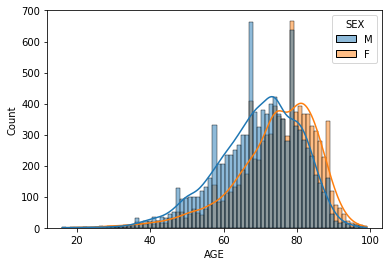

In [5]:
sns.histplot(x=df.AGE, kde=True, hue = df.SEX)

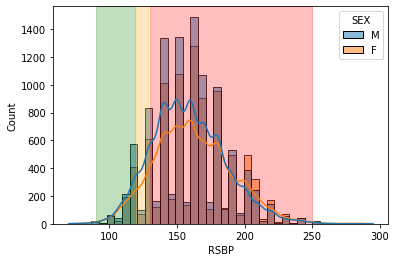

In [6]:
sns.histplot(x=df.RSBP, kde = True,  hue = df.SEX, bins = 40)
plt.axvspan(90, 119,alpha = 0.25, color = 'green')
plt.axvspan(120, 129,alpha = 0.25, color ='orange')
plt.axvspan(130, 250,alpha = 0.25, color ='red')

# https://www.cdc.gov/bloodpressure/about.htm
# normal: less than 120 mm Hg
# at risk (pre hypertension): 120–129 mm Hg
# hypertension: 130 mm Hg or higher

<AxesSubplot:xlabel='RATRIAL', ylabel='count'>

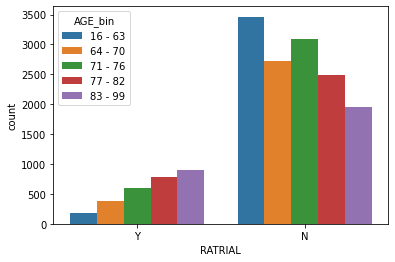

In [99]:
sns.countplot(x = df.RATRIAL, hue = df.AGE_bin.sort_values())

<AxesSubplot:xlabel='RATRIAL', ylabel='count'>

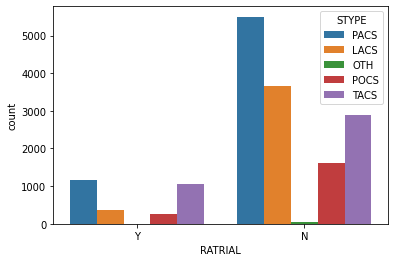

In [101]:
sns.countplot(x = df.RATRIAL, hue = df.STYPE)

<AxesSubplot:xlabel='RYEAR', ylabel='count'>

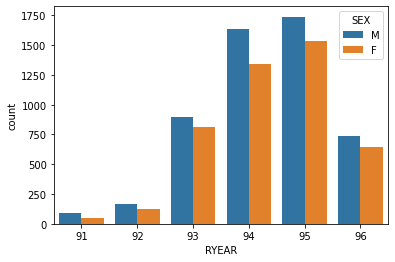

In [73]:
sns.countplot(x = df.RYEAR, hue = df.SEX)

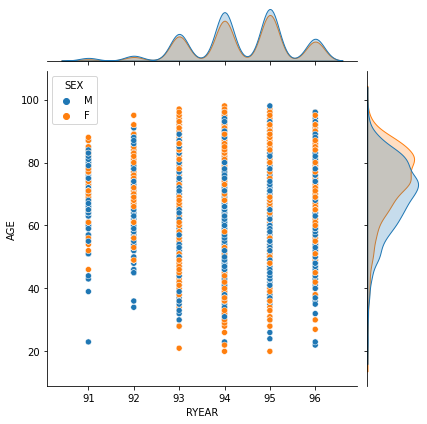

In [77]:
sns.jointplot(x = df.RYEAR, y = df.AGE, hue = df.SEX, kind = 'scatter')

In [23]:
df.groupby(['COUNTRY_ISO', 'SEX']).size().unstack(fill_value=0)

SEX             F     M
COUNTRY_ISO            
AR            219   326
AT            140    90
AU            239   358
BE            169   136
BR             36    47
CA             49    68
CH            789   842
CL             28    37
CZ            213   253
DK             13    22
ES            212   266
FI             33    52
FR              1     1
GB           3032  3225
GR             57    95
HK             51    64
HU             52    53
IE             27    31
IL             51    63
IN             76   153
IT           1505  1932
JP              4     5
LK              7    13
NL            349   379
NO            245   281
NZ            224   229
PL            374   385
PT            171   244
RO              8    10
SE            288   348
SG             60    80
SI             23    30
SK             42    44
TR            143   143
USA            70    61
ZA             28    41

<AxesSubplot:xlabel='count', ylabel='DIAG'>

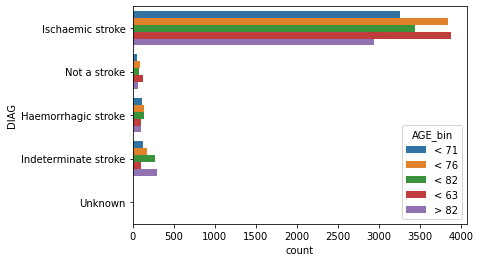

In [14]:
# combi of DDIAGISC, DDIAGHA, DDIAGUN, DNOSTRK
sns.countplot(y = df.DIAG, hue = df.AGE_bin)

<AxesSubplot:xlabel='count', ylabel='DIAG'>

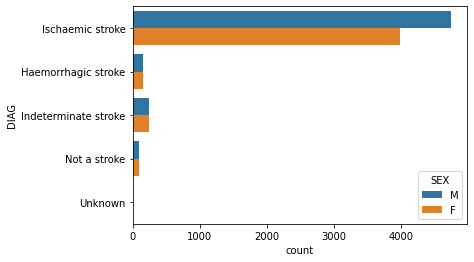

In [10]:
# combi of DDIAGISC, DDIAGHA, DDIAGUN, DNOSTRK
sns.countplot(y = df.DIAG, hue = df.SEX)

In [ ]:
# Variable DIAGSTR (Unknown is dropped, so is "not a stroke")


<ipython-input-32-16827aaaada5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


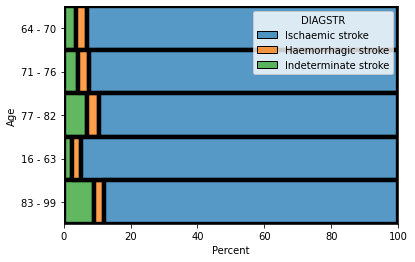

In [32]:
ax = sns.histplot(y = df.DIAGSTR,
                 hue= df.AGE_bin.sort_values,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Age")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-26-051a665aee6b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


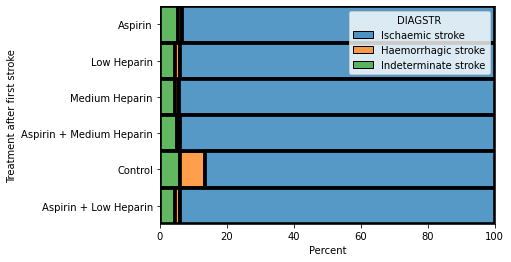

In [26]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.DIAGSTR,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [92]:
df.DIAG.value_counts()

Ischaemic stroke        17271
Indeterminate stroke      973
Haemorrhagic stroke       596
Name: DIAG, dtype: int64

In [93]:
# Calculate percentage of patients for each kind of stroke

istr_count = df.DIAG.value_counts()[0] # total number of patients with an ischaemic stroke
ind_count = df.DIAG.value_counts()[1] # total number of patients with an indeterminate stroke
hstr_count = df.DIAG.value_counts()[2] # total number of patients with a haemorraghic stroke

print(round((istr_count/ (istr_count + ind_count + hstr_count) * 100),2)) # percentage of patients with an ischaemic stroke
print(round((ind_count/ (istr_count + ind_count + hstr_count) * 100),2)) # percentage of patients with an indeterminate stroke
print(round((hstr_count/ (istr_count + ind_count + hstr_count) * 100),2)) # percentage of patients with a haemorraghic stroke

91.67
5.16
3.16


In [ ]:
group_str = df.groupby(by=['DIAGSTR', 'RDEF1'])
group_str['SEX'].value_counts()

In [94]:
# Only keep patients with an ischaemic stroke => df['DDIAGISC'].eq('Y')
df = df[df['DDIAGISC'].eq('Y')]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17271 entries, 0 to 19434
Columns: 114 entries, HOSPNUM to DEAD
dtypes: float64(16), int64(29), object(69)
memory usage: 15.2+ MB


In [96]:
df.to_csv('data/IST_corrected_model.csv') 

<ipython-input-10-f6fec088b12e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


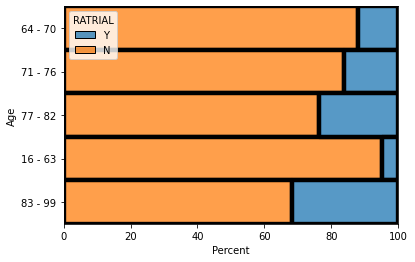

In [10]:
ax = sns.histplot(y = df.AGE_bin.sort_values(ascending = False),
                 hue= df.RATRIAL,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Age")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='RVISINF', ylabel='count'>

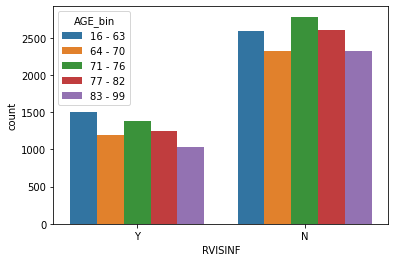

In [36]:
sns.countplot(x=df.RVISINF.sort_values(ascending=False), hue = df.AGE_bin.sort_values())

<AxesSubplot:xlabel='RHEP24', ylabel='count'>

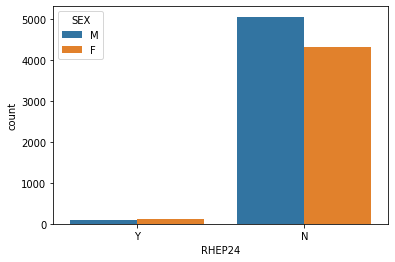

In [49]:
sns.countplot(x=df.RHEP24.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RASP3', ylabel='count'>

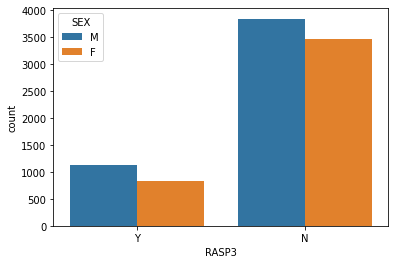

In [50]:
sns.countplot(x=df.RASP3.sort_values(ascending=False), hue = df.SEX)

In [ ]:
# Types of strokes and its associated symptoms

In [13]:
group_str = df.groupby(by=['STYPE', 'RDEF1'])
group_str['SEX'].value_counts()

STYPE  RDEF1  SEX
LACS   C      F         6
              M         6
       N      M       643
              F       483
       Y      M      1767
              F      1313
OTH    N      M        28
              F        22
PACS   C      F        51
              M        50
       N      M      1149
              F       887
       Y      M      2542
              F      2306
POCS   C      M        18
              F        10
       N      M       635
              F       343
       Y      M       588
              F       402
TACS   C      M        40
              F        32
       N      F       162
              M       153
       Y      F      1998
              M      1764
Name: SEX, dtype: int64

In [18]:
# Kick out patients with STPYE == 'OTH' (only few patients with this diagnosis)
df = df[df['STYPE'] != 'OTH']

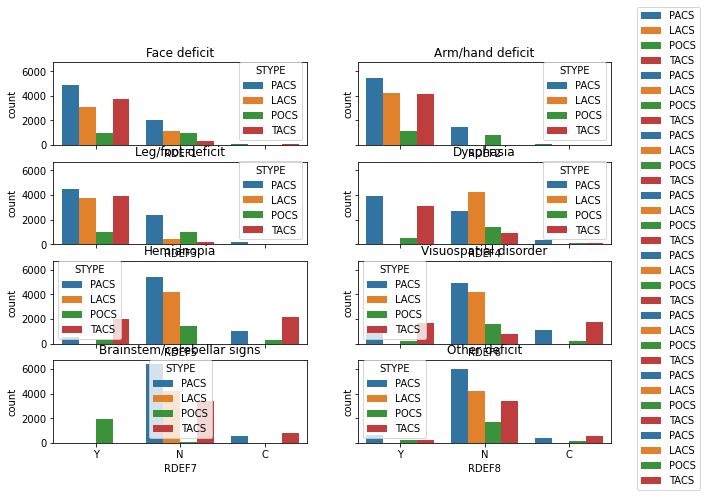

In [48]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 7), sharex=True, sharey=True)

sns.countplot(x=df.RDEF1.sort_values(ascending=False), hue = df.STYPE, ax = ax1).set_title('Face deficit')
sns.countplot(x=df.RDEF2.sort_values(ascending=False), hue = df.STYPE, ax = ax2).set_title('Arm/hand deficit')
sns.countplot(x=df.RDEF3.sort_values(ascending=False), hue = df.STYPE, ax = ax3).set_title('Leg/foot deficit')
sns.countplot(x=df.RDEF4.sort_values(ascending=False), hue = df.STYPE, ax = ax4).set_title('Dysphasia')
sns.countplot(x=df.RDEF5.sort_values(ascending=False), hue = df.STYPE, ax = ax5).set_title('Hemianopia')
sns.countplot(x=df.RDEF6.sort_values(ascending=False), hue = df.STYPE, ax = ax6).set_title('Visuospatial disorder')
sns.countplot(x=df.RDEF7.sort_values(ascending=False), hue = df.STYPE, ax = ax7).set_title('Brainstem/cerebellar signs')
sns.countplot(x=df.RDEF8.sort_values(ascending=False), hue = df.STYPE, ax = ax8).set_title('Other deficit')
#fig.legend(bbox_to_anchor= (1.03, 1))

<ipython-input-65-0db5913ec463>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


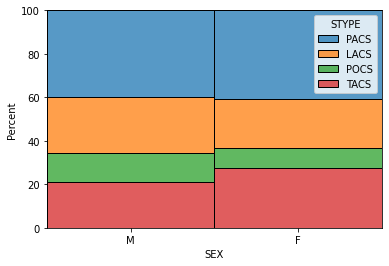

In [65]:
ax = sns.histplot(x = df.SEX.sort_values(),
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
#ax.set(xlabel="Sex")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [51]:
group_f_ddead = df.query('SEX == "F"').groupby('DDEAD')
group_f_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     2956
       LACS     1755
       TACS     1733
       POCS      671
U      LACS        1
Y      TACS      458
       PACS      288
       POCS       84
       LACS       46
Name: STYPE, dtype: int64

In [83]:
group_m_ddead = df.query('SEX == "M"').groupby('DDEAD')
group_m_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     1966
       LACS     1270
       TACS      846
       POCS      634
       OTH        15
U      LACS        1
       TACS        1
Y      TACS      242
       PACS      183
       POCS       63
       LACS       33
       OTH         2
Name: STYPE, dtype: int64

<AxesSubplot:xlabel='DASPLT', ylabel='count'>

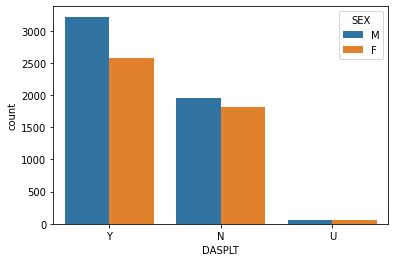

In [79]:
sns.countplot(x = df.DASPLT, hue = df.SEX)

<AxesSubplot:xlabel='ONDRUG', ylabel='AGE'>

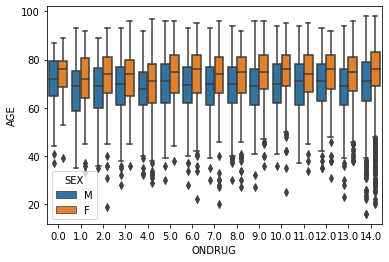

In [58]:
sns.boxplot(x = df.ONDRUG,y = df.AGE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DMEDS'>

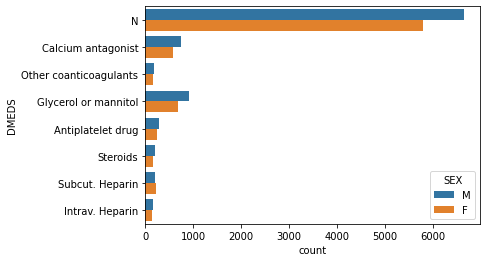

In [62]:
# combi of DSCH, DIVH, DAP, DOAC, DGORM, DSTER and DCAA
sns.countplot(y = df.DMEDS, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DMEDS'>

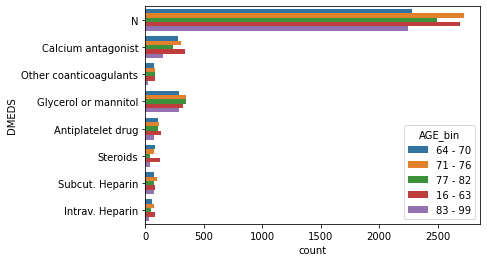

In [60]:
sns.countplot(y = df.DMEDS, hue = df.AGE_bin)

In [70]:
#some kind of surgery?
group_sur = df.groupby(by=['DHAEMD', 'DCAREND', 'DTHROMB'])
group_sur['STYPE'].value_counts()

DHAEMD  DCAREND  DTHROMB  STYPE
N       N        N        PACS     6469
                          LACS     3895
                          TACS     3847
                          POCS     1824
                 U        LACS        1
                 Y        TACS        7
                          LACS        3
                          PACS        2
                          POCS        1
        U        N        PACS        3
        Y        N        PACS       16
                          LACS       14
                          POCS        5
                          TACS        4
U       N        N        PACS        1
        U        N        PACS        4
                          TACS        4
                          LACS        1
                 U        PACS        2
                          LACS        1
                          POCS        1
                          TACS        1
Y       N        N        PACS      214
                          LACS      131
        

<AxesSubplot:xlabel='count', ylabel='RDIAG14'>

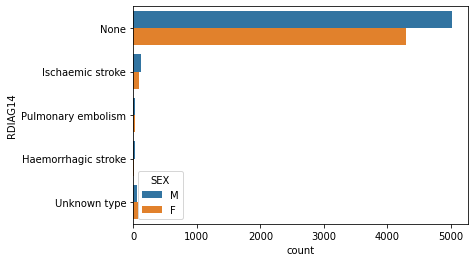

In [9]:
# Another occurrence of a stroke within 14 days of the first one?
# combined RSISC, DRSH, DRSUNK, DPE
sns.countplot(y = df.RDIAG14, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='RDIAG14'>

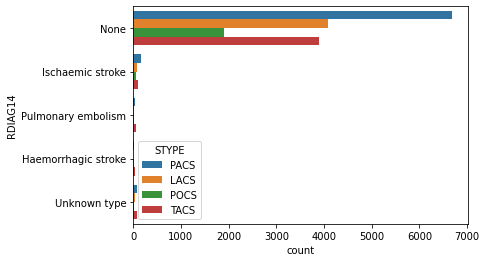

In [71]:
sns.countplot(y = df.RDIAG14, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

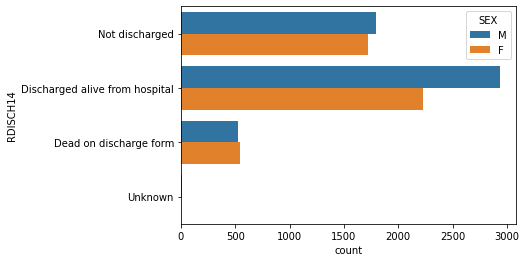

In [3]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

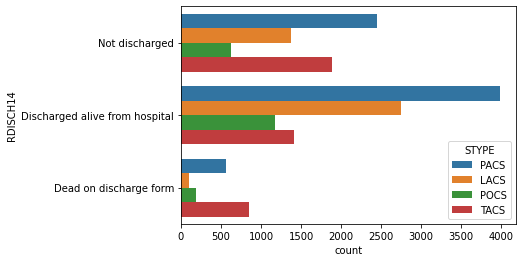

In [72]:
sns.countplot(y = df.RDISCH14, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

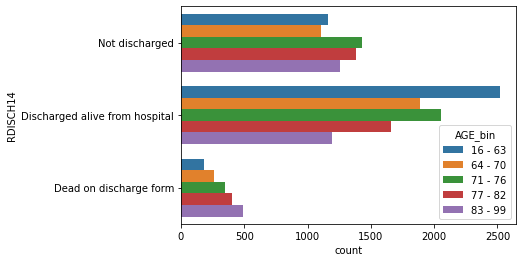

In [74]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.AGE_bin.sort_values())

In [17]:
#df['DPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

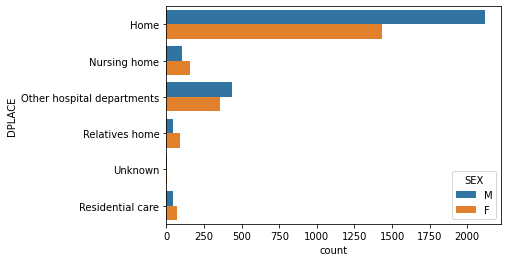

In [8]:
sns.countplot(y = df.DPLACE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

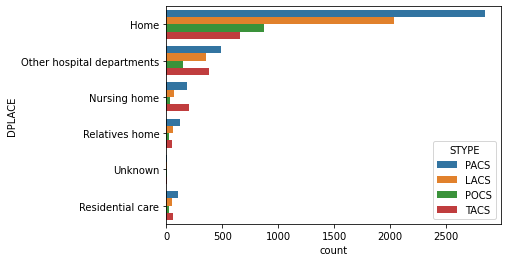

In [75]:
sns.countplot(y = df.DPLACE, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

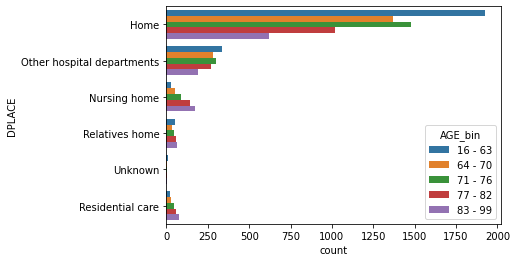

In [76]:
sns.countplot(y = df.DPLACE, hue = df.AGE_bin.sort_values())

In [41]:
#df['DDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='FDEAD', ylabel='count'>

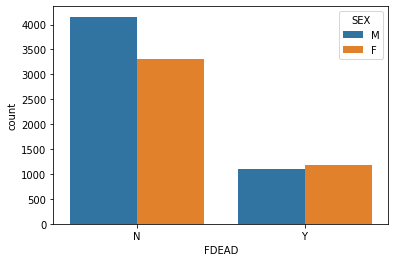

In [42]:
sns.countplot(x = df.FDEAD, hue = df.SEX)

<AxesSubplot:xlabel='FDEAD', ylabel='count'>

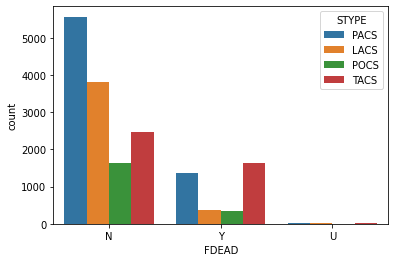

In [77]:
sns.countplot(x = df.FDEAD, hue = df.STYPE)

In [24]:
#df['FDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

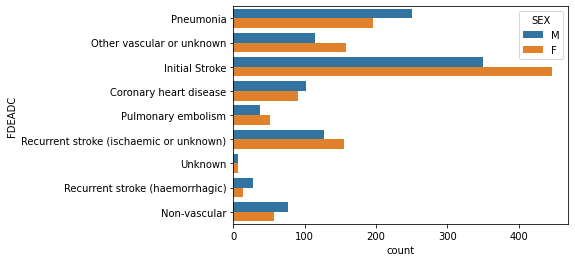

In [5]:
sns.countplot(y = df.FDEADC, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

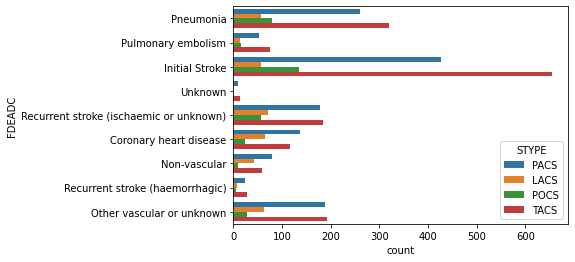

In [78]:
sns.countplot(y = df.FDEADC, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

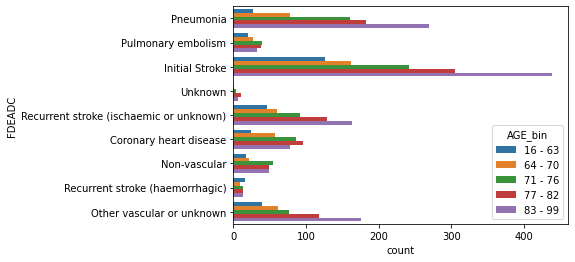

In [80]:
sns.countplot(y = df.FDEADC, hue = df.AGE_bin.sort_values())

<ipython-input-35-d0c10069c147>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


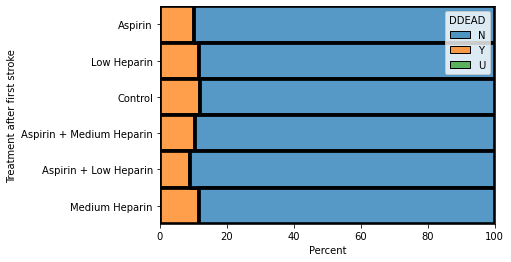

In [35]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.DDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-34-ed2ac60521f2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


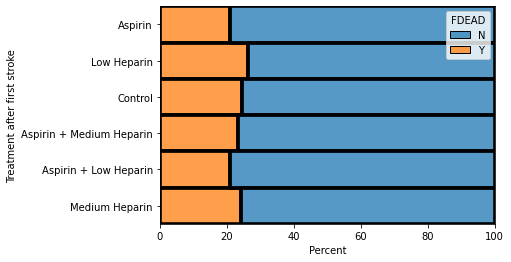

In [34]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.FDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-38-dc61f24218e7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


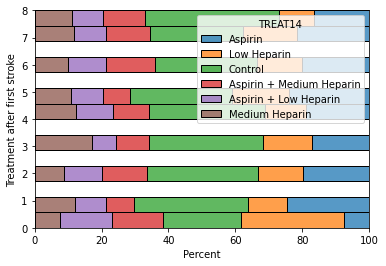

In [38]:
ax = sns.histplot(y = df.FDEADC,
                 hue= df.TREAT14,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Cause of death (6 months)")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='FRECOVER', ylabel='count'>

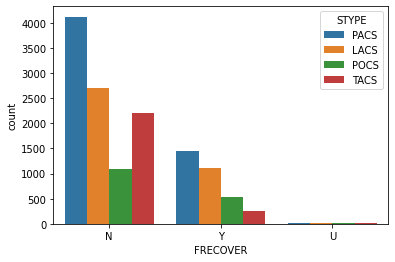

In [83]:
sns.countplot(x = df.FRECOVER, hue = df.STYPE)

<AxesSubplot:xlabel='FRECOVER', ylabel='count'>

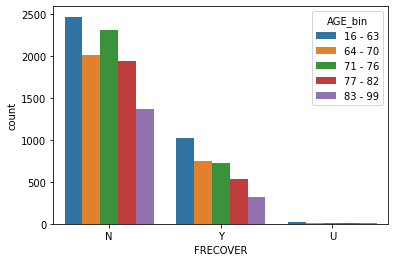

In [85]:
sns.countplot(x = df.FRECOVER, hue = df.AGE_bin.sort_values())

In [97]:
#df['FPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

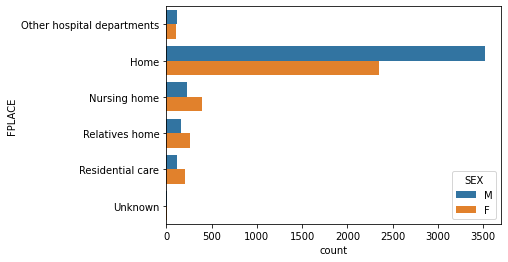

In [13]:
sns.countplot(y = df.FPLACE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

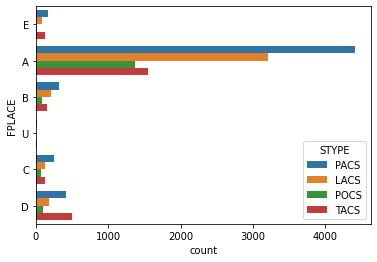

In [86]:
sns.countplot(y = df.FPLACE, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

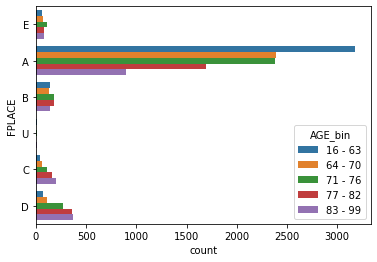

In [87]:
sns.countplot(y = df.FPLACE, hue = df.AGE_bin.sort_values())

<AxesSubplot:xlabel='FAP', ylabel='count'>

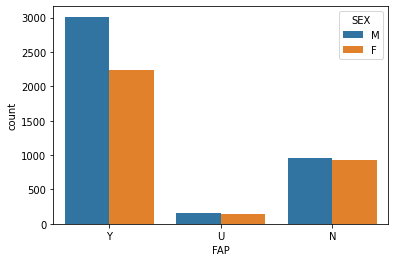

In [14]:
sns.countplot(x = df.FAP.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='FOAC', ylabel='count'>

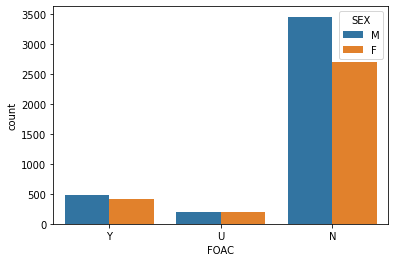

In [15]:
sns.countplot(x = df.FOAC.sort_values(ascending=False), hue = df.SEX)

In [90]:
#df['OCCODE'].replace({1: 'Dead', 2: 'Dependent', 3: 'Not recovered', 4: 'Recovered', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

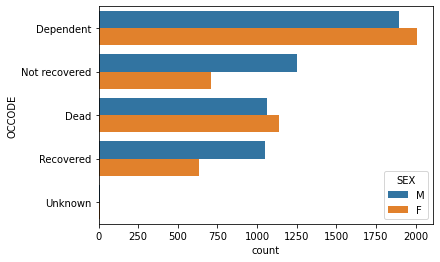

In [41]:
sns.countplot(y = df.OCCODE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

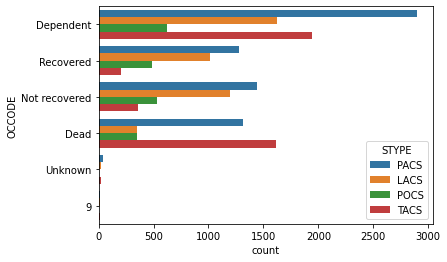

In [88]:
sns.countplot(y = df.OCCODE, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

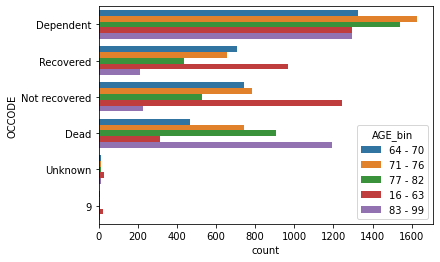

In [89]:
sns.countplot(y = df.OCCODE, hue = df.AGE_bin)

<AxesSubplot:xlabel='count', ylabel='DEAD'>

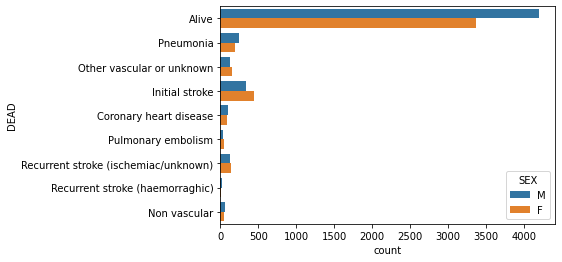

In [44]:
sns.countplot(y = df.DEAD, hue = df.SEX)

<ipython-input-50-b53a8d8b3c5e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


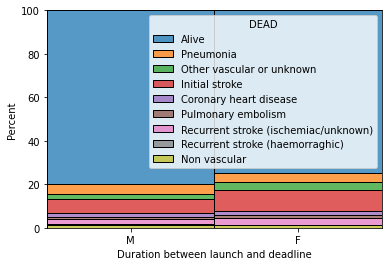

In [50]:
ax = sns.histplot(x = df.SEX,
                 hue= df.DEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [69]:
df.SEX.value_counts()
group1 = df.query('DEAD == "Alive"').groupby('DEAD')

m_count = df.SEX.value_counts()[0] # total number of male patients
f_count = df.SEX.value_counts()[1] # total number of male patients

m_alive = group1['SEX'].value_counts()[0] # number of male patients alive after 6 months
f_alive = group1['SEX'].value_counts()[1] # number of female patients alive after 6 months

print(round((m_alive / m_count * 100),2)) # percentage of male patients being alive after 6 months
print(round((f_alive / f_count * 100),2)) # percentage of male patients being alive after 6 months


79.79
74.76


In [52]:
df_dead = df.loc[df['DEAD'] != 'Alive']

<ipython-input-57-fe8725bf09ef>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


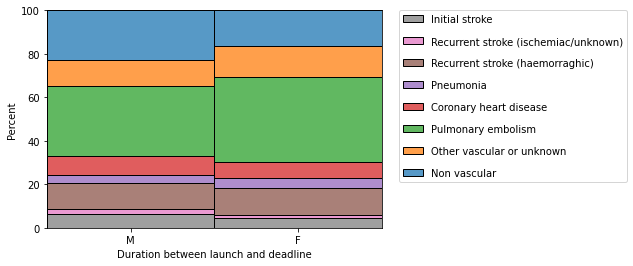

In [57]:
ax = sns.histplot(x = df_dead.SEX,
                 hue= df_dead.DEAD.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [105]:
df_alive = df.loc[df['DEAD'] == 'Alive']

In [94]:
df_alive.OCCODE.value_counts()

Dependent        3903
Not recovered    1960
Recovered        1680
Unknown            19
Dead                1
Name: OCCODE, dtype: int64

In [99]:
group2 = df.query('OCCODE == "Dependent"').groupby('SEX')
print(group2['FPLACE'].value_counts())


SEX  FPLACE                    
F    Home                          1151
     Nursing home                   377
     Relatives home                 171
     Residential care               167
     Other hospital departments     102
     Unknown                          7
M    Home                          1356
     Nursing home                   225
     Other hospital departments     102
     Relatives home                  97
     Residential care                77
     Unknown                          2
Name: FPLACE, dtype: int64


In [100]:
group3 = df.query('OCCODE == "Not recovered"').groupby('SEX')
print(group3['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                           636
     Relatives home                  43
     Residential care                19
     Nursing home                     9
     Other hospital departments       4
M    Home                          1166
     Relatives home                  43
     Residential care                28
     Other hospital departments       7
     Nursing home                     4
     Unknown                          1
Name: FPLACE, dtype: int64


In [101]:
group4 = df.query('OCCODE == "Recovered"').groupby('SEX')
print(group4['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                           561
     Relatives home                  41
     Residential care                20
     Nursing home                     7
     Other hospital departments       1
     Unknown                          1
M    Home                          1003
     Relatives home                  21
     Residential care                17
     Other hospital departments       5
     Nursing home                     3
Name: FPLACE, dtype: int64


<ipython-input-102-68f573c18042>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


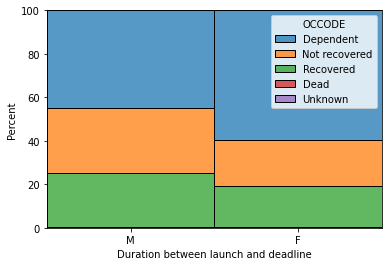

In [102]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.OCCODE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-106-6449403f472a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


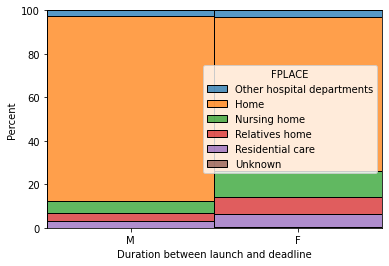

In [106]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-107-bb543009419d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


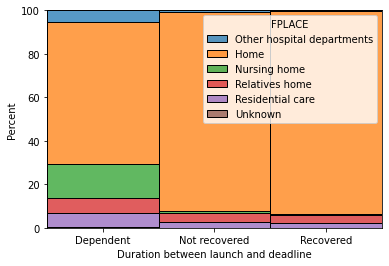

In [107]:
ax = sns.histplot(x = df_alive.OCCODE,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()